<a href="https://colab.research.google.com/github/saadz-khan/StyleGAN-client/blob/master/ISR_Prediction_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Install ISR
(skip if using local repo)

In [1]:
!pip install ISR
!pip install 'h5py==2.10.0' --force-reinstall
!gdown --id 1jFcc51irf-i3H63EitisLCEf2-3wX4fS

     |████████████████████████████████| 86.3 MB 52 kB/s 
     |████████████████████████████████| 3.8 MB 39.2 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 449 kB 45.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=117d26e72c3b6d6a80cd6e6fc9481dc78f2db881272474e2cc443088002f8a04
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

Downloading...
From: https://drive.google.com/uc?id=1jFcc51irf-i3H63EitisLCEf2-3wX4fS
To: /content/sea_turtle.png
100% 541k/541k [00:00<00:00, 71.8MB/s]


# Predict

Download a sample image

In [1]:
!wget http://images.math.cnrs.fr/IMG/png/section8-image.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

--2021-11-25 21:41:11--  http://images.math.cnrs.fr/IMG/png/section8-image.png
Resolving images.math.cnrs.fr (images.math.cnrs.fr)... 134.206.83.12
Connecting to images.math.cnrs.fr (images.math.cnrs.fr)|134.206.83.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114590 (112K) [image/png]
Saving to: ‘section8-image.png’

section8-image.png  100%[===================>] 111.90K   349KB/s    in 0.3s    

2021-11-25 21:41:12 (349 KB/s) - ‘section8-image.png’ saved [114590/114590]



Load the image with PIL

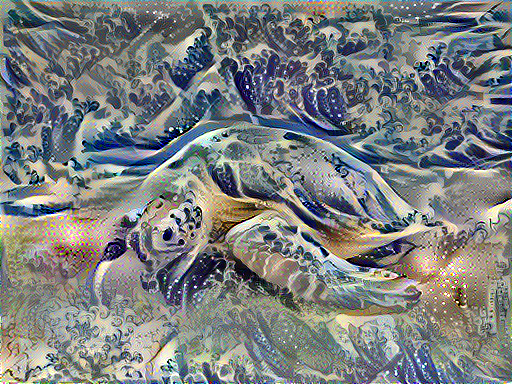

In [2]:
import numpy as np
from PIL import Image

img = Image.open('data/input/test_images/sea_turtle.png')
img

## Get predictions

### Create the model and run prediction
Create a RRDN or RDN model with the provided pre-trained weights, choose one

In [3]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

# model = RDN(weights='noise-cancel')
model = RRDN(weights='gans')
# model = RDN(weights='psnr-small')
# model = RDN(weights='psnr-large')

17465344/17462488 [==============================] - 8s 0us/step


#### Baseline

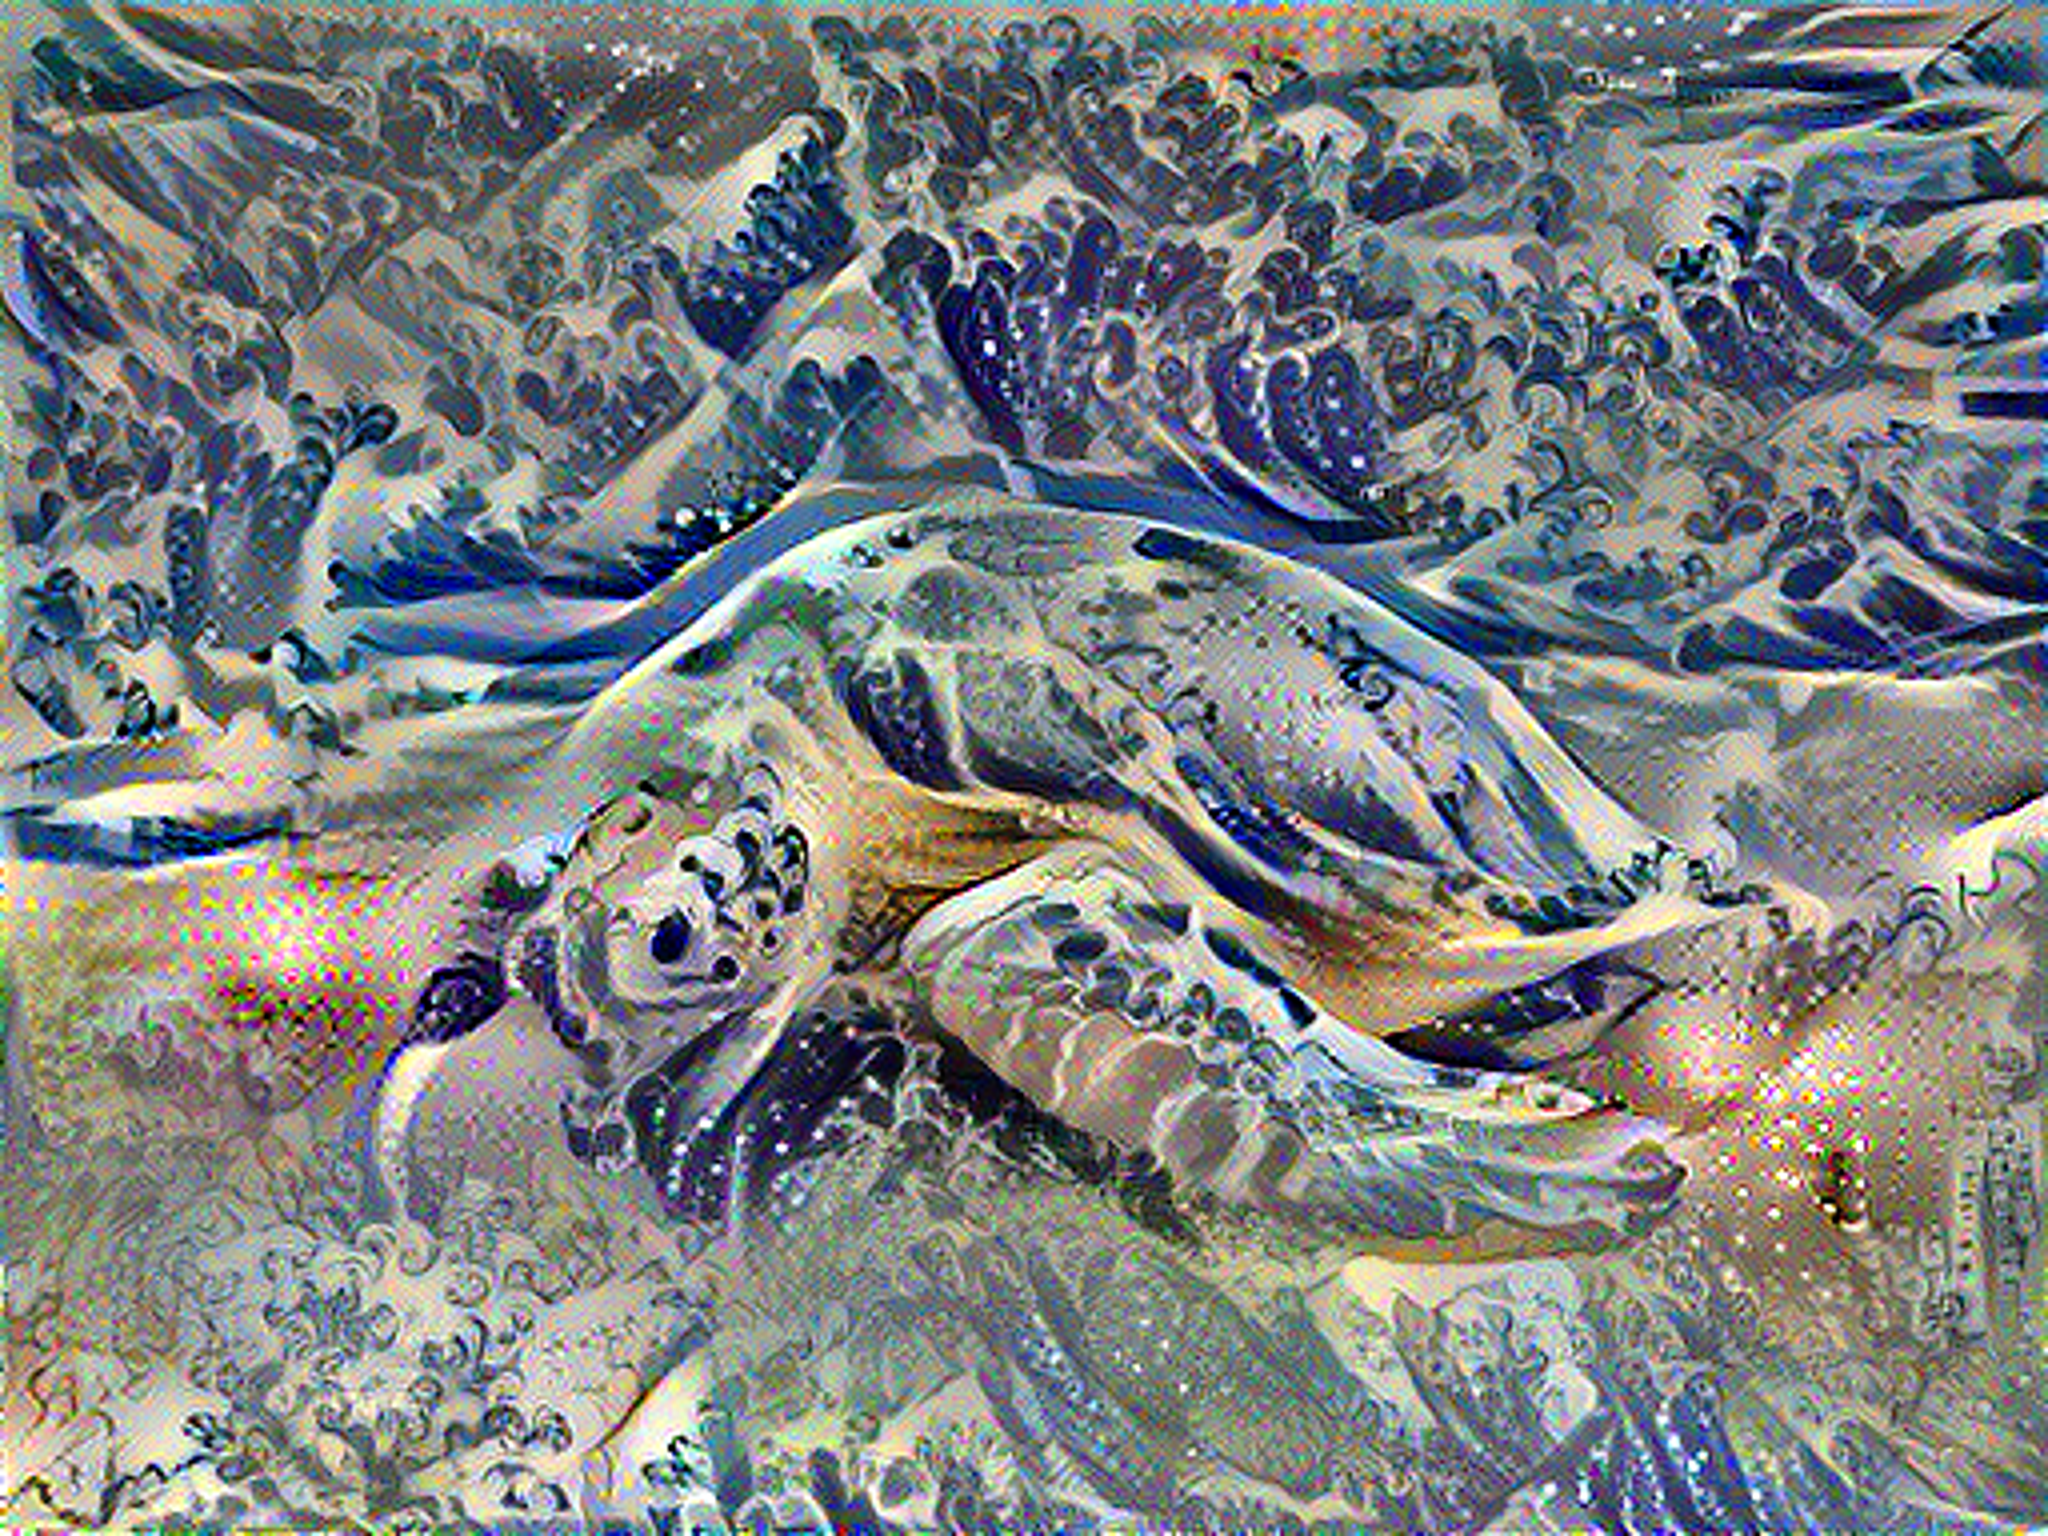

In [15]:
img.resize(size=(img.size[0]*2, img.size[1]*2), resample=Image.BICUBIC)

#### Prediction

In [18]:
sr_img = model.predict(np.array(img))
final_img = Image.fromarray(sr_img)

In [20]:
final_img = final_img.resize((1024, 1024))

In [23]:
final_img.save('/content/final.png')

### Usecase: upscaling noisy images

In [ ]:
from ISR.models import RDN, RRDN

model = RDN(weights='noise-cancel')
sr_img = model.predict(np.array(img))
img = Image.fromarray(sr_img)
img.save('/content/final2.png')
img

In [9]:
img = img.resize((1024,1024))
img.save('/content/final2.png')

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [ ]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='data/input/test_images/')
predictor.get_predictions(model=rdn, weights_path='')